In [1]:
import numpy as np
import matplotlib.pyplot as plt

### **Generating multi-dimensional data**

In [2]:
# generating a random positive semi-definite symmetric covariance matrix and mean matrix 
mean = [5.0, 8.0, 15.0, 20.0, 25.0]
cov = np.random.rand(len(mean), len(mean))
cov = (cov + cov.T)/2
for i in range(len(mean)):
    cov[i][i] = 1.0
cov

array([[1.        , 0.45482668, 0.81645561, 0.53836358, 0.39433709],
       [0.45482668, 1.        , 0.52901323, 0.25656407, 0.17276646],
       [0.81645561, 0.52901323, 1.        , 0.70234697, 0.71161832],
       [0.53836358, 0.25656407, 0.70234697, 1.        , 0.12126434],
       [0.39433709, 0.17276646, 0.71161832, 0.12126434, 1.        ]])

In [3]:
data = np.random.multivariate_normal(mean, cov, size=1000)
data.shape

<ipython-input-3-62020ce8c0fd>:1: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(mean, cov, size=1000)


(1000, 5)

In [4]:
data_copy = data.copy()
data_copy

array([[ 5.73711965,  8.4330535 , 16.58376085, 21.43305514, 26.28943815],
       [ 4.69877224,  7.33411474, 13.1208508 , 17.58724844, 23.8669094 ],
       [ 4.68008579,  7.23616498, 14.52795222, 19.51579349, 25.48261742],
       ...,
       [ 5.30740944,  8.05734237, 14.61177515, 19.40726058, 24.62448757],
       [ 4.32121004,  7.31333651, 15.13744549, 20.43378066, 25.89738803],
       [ 4.75435912,  6.78803696, 13.67291205, 19.66505541, 23.21170258]])

### **Splitting and Reshaping Data for preprocessing**

In [5]:
x_vals = data_copy[:, :-1]
y_vals = data_copy[:, -1]

In [6]:
X_train = x_vals[:int(-0.1*len(x_vals)), :]
X_test = x_vals[int(-0.1*len(x_vals)):, :]
print("X_train.shape =", X_train.shape)
print("X_test =", X_test.shape)
y_train = y_vals[:int(-0.1*len(y_vals))]
y_test = y_vals[int(-0.1*len(y_vals)):]
print("y_train.shape =", y_train.shape)
print("y_test.shape =", y_test.shape)

# adding a new column of ones in the X_train and X_test
X_train = np.hstack((np.ones( (len(X_train), 1) ), X_train))
X_test = np.hstack((np.ones((len(X_test), 1)), X_test))
print("X_train.shape after adding the ones =", X_train.shape)
print("X_test after adding the ones =", X_test.shape)

X_train.shape = (900, 4)
X_test = (100, 4)
y_train.shape = (900,)
y_test.shape = (100,)
X_train.shape after adding the ones = (900, 5)
X_test after adding the ones = (100, 5)


### **Scaling the Data for increasing the efficiency of our model**

In [7]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)+1
X_test =  scalar.fit_transform(X_test)+1
y_test = scalar.fit_transform(y_test.reshape(-1, 1))+1
y_train = scalar.fit_transform(y_train.reshape(-1, 1))+1

### **Making necessary functions**

In [8]:
def hypothesis(X, theta):
    #            (m, 4) , (4, 1)
    return np.dot(X, theta)

In [9]:
def cost(X, y, theta):
    m = X.shape[0]
    h = hypothesis(X, theta)
    return (0.5/m) * np.sum( (h-y)**2 )

#### **Unvectorized Batch Gradient Descent on multi-variate data**

In [10]:
def batch_gradient_descent(X, y, learning_rate = 0.001, epochs=500):
    m = X.shape[0]
    theta = np.ones((X.shape[1], 1))
    h = hypothesis(X, theta)
    temp = theta
    costs = []
    iters = []
    for i in range(epochs):
        temp[0] = theta[0] - ((learning_rate)/m) * np.sum(h - y)
        for j in range(1, X.shape[1]):
            temp[j] = theta[j] - ((learning_rate)/m) * np.sum(np.dot(np.transpose(X[:, j]), (h - y)))
        theta = temp
        h = hypothesis(X, theta)
        new_cost = cost(X, y, theta)
        if i%10 == 0:
            costs.append(new_cost)
            iters.append(i+1)
    plt.plot(iters, costs)
    return new_cost, theta

#### **Vecotrized Batch Gradient Descent on multi-variate data**

In [11]:
def batch_gradient_descent_vectorized(X, y, learning_rate = 0.001, epochs=500):
    m = X.shape[0]
    theta = np.ones((X.shape[1], 1))
    h = hypothesis(X, theta)
    costs = []
    iters = []
    for i in range(epochs):
        gradient = np.dot(X.T, (h-y))
        theta = theta - ((learning_rate)/m) * gradient
        h = hypothesis(X, theta)
        new_cost = cost(X, y, theta)
        if i%10 == 0:
            costs.append(new_cost)
            iters.append(i+1)
    plt.plot(iters, costs)
    return new_cost, theta

#### The vectorized implementation is clearly faster than the unvectorized one

16.8 ms ± 116 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


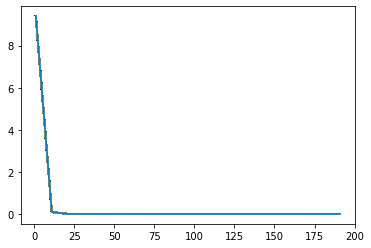

In [12]:
%timeit cost_updated_1, theta_updated_1 = batch_gradient_descent(X_train, y_train, 0.18, 200)

6.06 ms ± 46.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


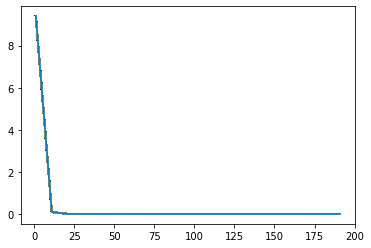

In [13]:
%timeit cost_updated_2, theta_updated_2 = batch_gradient_descent_vectorized(X_train, y_train, 0.18, 200)

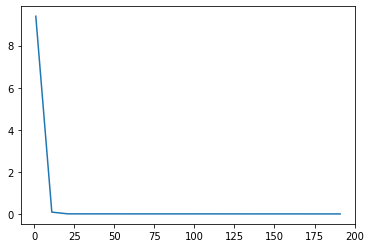

In [14]:
cost_updated_1, theta_updated_1 = batch_gradient_descent(X_train, y_train, 0.18, 200)

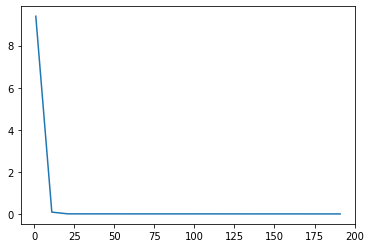

In [24]:
cost_updated_2, theta_updated_2 = batch_gradient_descent_vectorized(X_train, y_train, 0.18, 200)

#### Final values of the cost function and theta

In [16]:
print("cost_updated_1 =", cost_updated_1)
print("cost_updated_2 =", cost_updated_2)
print("theta_updated_1\n", theta_updated_1)
print("theta_updated_2\n", theta_updated_2)

cost_updated_1 = 0.009758398249584199
cost_updated_2 = 0.009758398249584202
theta_updated_1
 [[ 0.49530926]
 [ 0.15831401]
 [ 0.08975538]
 [ 0.40918145]
 [-0.00392782]]
theta_updated_2
 [[ 0.49530926]
 [ 0.15831401]
 [ 0.08975538]
 [ 0.40918145]
 [-0.00392782]]


#### Cost function value for the testing data set

In [17]:
cost_test = cost(X_test, y_test, theta_updated_2)

In [18]:
cost_test

0.016248385922952555

In [19]:
# plt.plot(X_test[:, 1:], hypothesis(X_test, theta_updated_2))